<a href="https://colab.research.google.com/github/girishkuks/data_science/blob/main/Linear_Regression04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
data = pd.read_csv('https://raw.githubusercontent.com/girishkuks/data_science/refs/heads/main/Algerian_forest_fires_dataset.csv')

In [86]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [87]:
data.count()

,0
day,246
month,245
year,245
Temperature,245
RH,245
Ws,245
Rain,245
FFMC,245
DMC,245
DC,245


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [40]:
data.isna().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [88]:
data[data.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
data.loc[168:169]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
169,15,7,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire


In [89]:
data = data.drop([122,123,168]).reset_index(drop=True)

In [94]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [95]:
data.count()

,0
day,244
month,244
year,244
Temperature,244
RH,244
Ws,244
Rain,244
FFMC,244
DMC,244
DC,244


In [96]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [97]:
data.columns = data.columns.str.strip()

In [100]:
data = data.drop([122,123,168]).reset_index(drop=True)

In [101]:
data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [102]:
data[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = data[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [59]:
data.info()

data_copy = data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


In [103]:
data.drop(['day','month','year'], axis=1, inplace=True)

In [104]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [105]:
data['Classes'].value_counts()

,count
Classes,
fire,130
not fire,100
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [106]:
data['Classes'] = data['Classes'].str.strip()

In [107]:
data['Classes'].value_counts()

,count
Classes,
fire,136
not fire,105


In [108]:
data['Classes'] = np.where(data['Classes'] == 'fire', 1, 0)

In [109]:
data['Classes'].value_counts()

,count
Classes,
1,136
0,105


In [69]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


<Axes: >

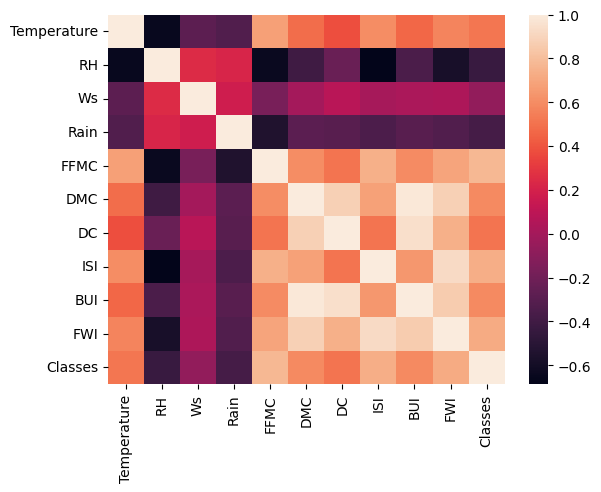

In [70]:
sns.heatmap(data.corr())

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


scalar = StandardScaler()
Y = data['FWI']
X = data.drop(['FWI'],axis=1)

X_scalar = scalar.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scalar, Y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

score = r2_score(Y_test, Y_pred)

mse = mean_squared_error(Y_test, Y_pred)

mae = mean_absolute_error(Y_test, Y_pred)

print('R2 Score-----', round(score*100,2))

print('Mean Squared Error-----', round(mse*100,2))

print('Mean Absolute Error-----', round(mae*100,2))

R2 Score----- 99.01
Mean Squared Error----- 46.13
Mean Absolute Error----- 47.04


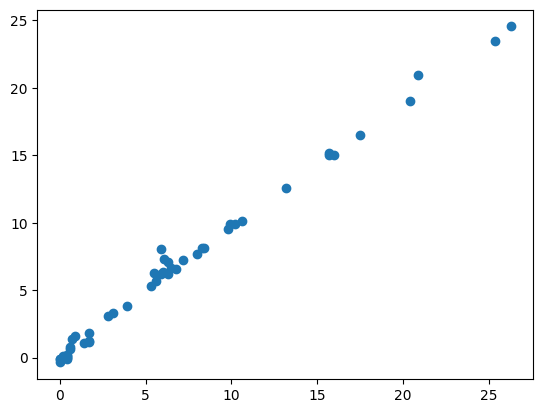

In [136]:
plt.scatter(Y_test, Y_pred)

In [ ]:
### Lasso Regresstion

In [142]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lass_model = Lasso()

lass_model.fit(X_train, Y_train)

Y_pred = lass_model.predict(X_test)

score = r2_score(Y_test, Y_pred)

mse = mean_squared_error(Y_test, Y_pred)

mae = mean_absolute_error(Y_test, Y_pred)

print('R2 Score-----', round(score*100,2))

print('Mean Squared Error-----', round(mse*100,2))

print('Mean Absolute Error-----', round(mae*100,2))

R2 Score----- 95.52
Mean Squared Error----- 209.55
Mean Absolute Error----- 108.05


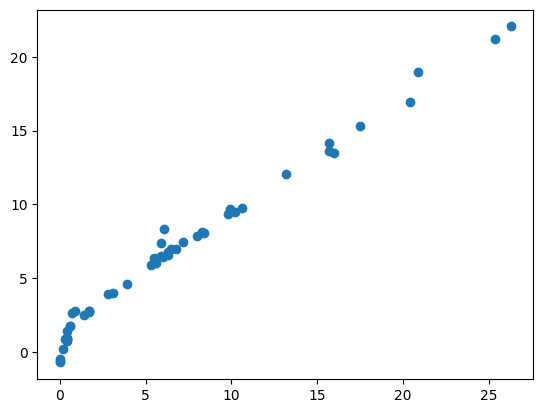

In [143]:
plt.scatter(Y_test, Y_pred)

In [ ]:
## Ridge Regression

In [144]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ridge_model = Ridge()

ridge_model.fit(X_train, Y_train)

Y_pred = ridge_model.predict(X_test)

score = r2_score(Y_test, Y_pred)

mse = mean_squared_error(Y_test, Y_pred)

mae = mean_absolute_error(Y_test, Y_pred)

print('R2 Score-----', round(score*100,2))

print('Mean Squared Error-----', round(mse*100,2))

print('Mean Absolute Error-----', round(mae*100,2))

R2 Score----- 98.57
Mean Squared Error----- 66.82
Mean Absolute Error----- 52.83


In [ ]:
### Elastic Net

R2 Score----- 88.74
Mean Squared Error----- 526.77
Mean Absolute Error----- 166.59


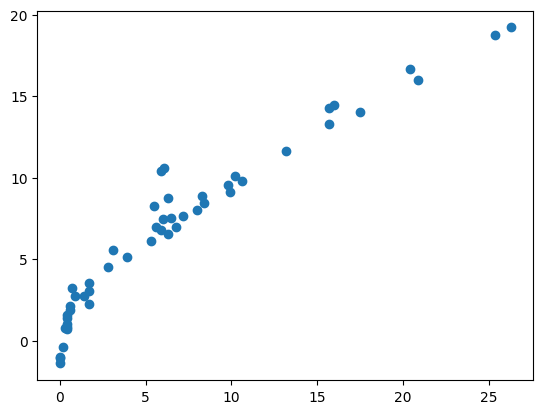

In [146]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

elastic_model = ElasticNet()

elastic_model.fit(X_train, Y_train)

Y_pred = elastic_model.predict(X_test)

score = r2_score(Y_test, Y_pred)

mse = mean_squared_error(Y_test, Y_pred)

mae = mean_absolute_error(Y_test, Y_pred)

print('R2 Score-----', round(score*100,2))

print('Mean Squared Error-----', round(mse*100,2))

print('Mean Absolute Error-----', round(mae*100,2))

plt.scatter(Y_test, Y_pred)